In [5]:
from sklearn.svm import SVC
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [6]:
iris = load_iris()
X = iris["data"]
y = iris["target"]

KMeans(
    n_clusters=8,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm="auto",
)

# Створення моделі
kmeans = KMeans(n_clusters = 5)
# Тренування моделі
kmeans.fit(X)
# Створення прогнозу
y_kmeans = kmeans.predict(X)

e:\ZTU\7_semester\AI\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\ZTU\7_semester\AI\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\ZTU\7_semester\AI\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


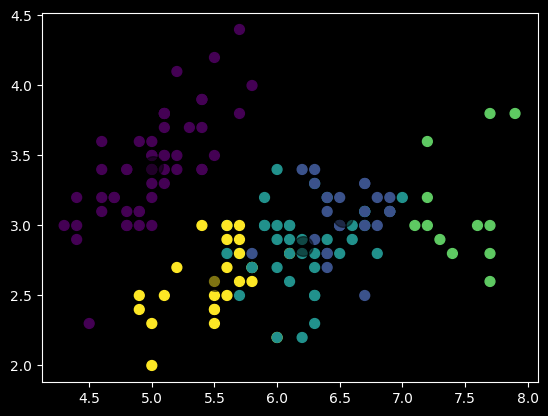

In [7]:
# Відображення значень
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

e:\ZTU\7_semester\AI\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


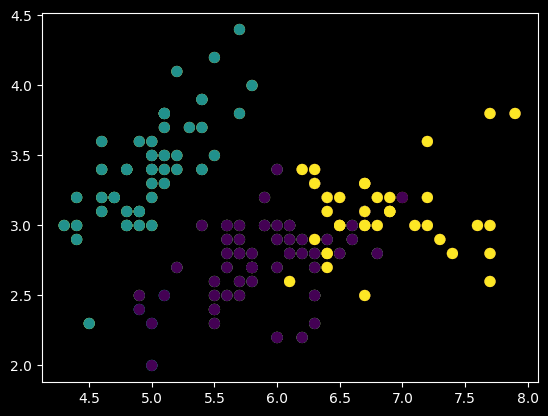

In [9]:
# Функція для знаходження кластерів
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break

        centers = new_centers
        
    return centers, labels


centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")
centers, labels = find_clusters(X, 3, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")
labels = KMeans(3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")